In [1]:
import tradingeconomics as te

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [3]:

raw_data_cases = te.getHistoricalData(country='United States', indicator='Coronavirus Cases', initDate='2020-12-31', output_type='df')
raw_data_vaccination = te.getHistoricalData(country='United States', indicator='Coronavirus Vaccination Rate', initDate='2021-01-01', output_type='df')


In [4]:
cases_data = raw_data_cases[['Value','DateTime']].rename(columns = {'Value': 'Cases'})

cases_data['Thousand Cases'] = round(cases_data['Cases'] / 1000 ,2)
cases_data['Date'] = pd.DatetimeIndex(cases_data['DateTime'])
cases_data.set_index('Date', inplace=True)
del cases_data['DateTime']
cases_data = cases_data.diff()
cases_data

vaccination_data = raw_data_vaccination[['Value', 'DateTime']].rename(columns = {'Value': 'Vaccination Rate'})
vaccination_data['Date'] = pd.DatetimeIndex(vaccination_data['DateTime'])
vaccination_data.set_index('Date', inplace=True)
del vaccination_data['DateTime']


df = pd.merge(cases_data,vaccination_data, on='Date')


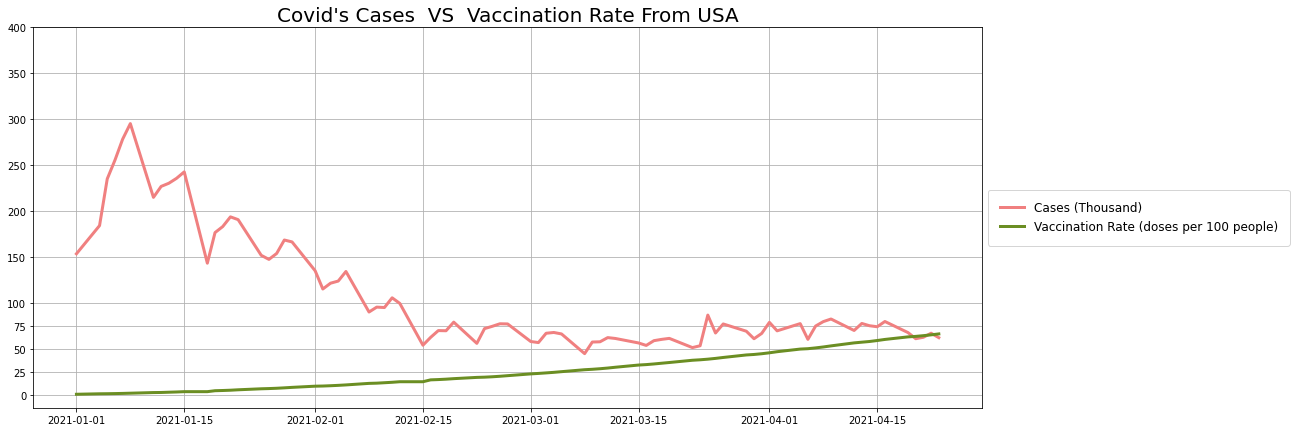

In [5]:
plt.subplots(figsize=(17, 7))

plt.plot( df.index.tolist(), df['Thousand Cases'].values.tolist(), color='lightcoral', linewidth=3, label="Cases (Thousand)")
plt.plot( df.index.tolist(), df['Vaccination Rate'].values.tolist(), color='olivedrab', linewidth=3, label="Vaccination Rate (doses per 100 people)")

plt.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)
plt.title("Covid's Cases  VS  Vaccination Rate From USA", size=20)
plt.yticks(list(plt.yticks()[0]+50) + [25,75])
plt.show()